### Exploratory Data Analysis (Mudae - #wishing channel)

Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wishing_df = pd.read_csv("lovely psychopaths - Mudae _ Gacha - wishing [910386112344752158].csv")

In [3]:
wishing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130215 entries, 0 to 130214
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   AuthorID     130215 non-null  int64 
 1   Author       130215 non-null  object
 2   Date         130215 non-null  object
 3   Content      81170 non-null   object
 4   Attachments  105 non-null     object
 5   Reactions    20081 non-null   object
dtypes: int64(1), object(5)
memory usage: 6.0+ MB


In [4]:
wishing_df.shape

(130215, 6)

In [5]:
wishing_df['Author'].value_counts()

Mudae#0807                              60222
Raviolla#5477                           17408
Daniel0331#0560                         10780
kyoya#1101                               6431
Lucashrielze6913#9712                    5429
kyoya2#6627                              4042
AC#3949                                  3957
ravioli#0974                             3716
Danyeeel_#6535                           3663
gumer#4279                               3476
sunnyrua#4032                            3459
KamisatoAyato69420#8195                  1899
emgumi69420#8911                         1519
YaeMilk69420#9566                        1290
disablebot69420#4303                     1290
CallMeTreb#1183                           771
RikuItsuki#3046                           746
albertibay#1663                            78
YAGPDB.xyz#8760                            16
Carl-bot#1536                               8
Abet's Rainbow and Unicorn Army#5245        6
AIRHORN SOLUTIONS#0001            

In the above, `ravioli #TresLangAngKailangan#0000` (910388388069261300)'s presence is due to NQN emotes. Normally, we would like to include these counts to make it not biased towards Nitro users who can send Nitro emotes under the same `Author`/`Author ID` of their main. But due to the count only being one (1), it won't be included for simplicity's sake.

In [6]:
wishing_df['AuthorID'].isnull().any()

False

In [7]:
wishing_df['Author'].isnull().any()

False

In [8]:
wishing_df['Date'].isnull().any()

False

In [9]:
wishing_df['Content'].isnull().any()

True

In [10]:
wishing_df['Content'].isnull()

0         False
1          True
2         False
3         False
4         False
          ...  
130210    False
130211    False
130212     True
130213    False
130214     True
Name: Content, Length: 130215, dtype: bool

In [11]:
wishing_df.head()

,AuthorID,Author,Date,Content,Attachments,Reactions
0,298454523624554501,kyoya#1101,17-Nov-21 12:30 PM,$w,NaN,NaN
1,432610292342587392,Mudae#0807,17-Nov-21 12:30 PM,NaN,NaN,NaN
2,577505465966133248,Daniel0331#0560,17-Nov-21 12:30 PM,oh god,NaN,NaN
3,577505465966133248,Daniel0331#0560,17-Nov-21 12:30 PM,so it begins,NaN,NaN
4,727511628496765030,gumer#4279,17-Nov-21 12:30 PM,$h,NaN,NaN


### Data Cleaning

In [12]:
# Make a copy of the dataframe and make changes there
df = wishing_df.copy()

Remove unrelated users

In [13]:
df = df.drop(df[df['Author'] == "YAGPDB.xyz#8760"].index)
df = df.drop(df[df['Author'] == "Carl-bot#1536"].index)
df = df.drop(df[df['Author'] == "Abet's Rainbow and Unicorn Army#5245"].index)
df = df.drop(df[df['Author'] == "AIRHORN SOLUTIONS#0001"].index)
df = df.drop(df[df['Author'] == "Santae#9237"].index)
df = df.drop(df[df['Author'] == "ravioli #TresLangAngKailangan#0000"].index)
df = df.drop(df[df['Author'] == "NQN#3454"].index)

Map alts to the main accounts

In [14]:
df_with_alt = df.copy()  # Make a copy before mapping for use later

# Exlude those without alts from the dataset
df_with_alt = df_with_alt.drop(df_with_alt[df_with_alt['Author'] == "Mudae#0807"].index)  # exlude Mudae bot
df_with_alt = df_with_alt.drop(df_with_alt[df_with_alt['Author'] == "RikuItsuki#3046"].index)
df_with_alt = df_with_alt.drop(df_with_alt[df_with_alt['Author'] == "Ginnobi#5960"].index)

In [15]:
# In doing this, we should still map correct values in the dictionary parameter, or else they instead be mapped to NaN
df['Author'] = df['Author'].map({'Mudae#0807': 'Mudae#0807', 
                                 'Raviolla#5477': 'Raviolla#5477',                  'ravioli#0974': 'Raviolla#5477',
                                 'Daniel0331#0560': 'Daniel0331#0560',              'Danyeeel_#6535': 'Daniel0331#0560',
                                 'kyoya#1101': 'kyoya#1101',                        'kyoya2#6627': 'kyoya#1101',
                                 'Lucashrielze6913#9712': 'Lucashrielze6913#9712',  'YaeMilk69420#9566': 'Lucashrielze6913#9712',
                                 'AC#3949': 'AC#3949',                              'KamisatoAyato69420#8195': 'AC#3949',
                                 'gumer#4279': 'gumer#4279',                        'emgumi69420#8911': 'gumer#4279',
                                 'sunnyrua#4032': 'sunnyrua#4032',                  'disablebot69420#4303': 'sunnyrua#4032',
                                 'CallMeTreb#1183': 'CallMeTreb#1183',              'albertibay#1663':'CallMeTreb#1183',
                                 'RikuItsuki#3046': 'RikuItsuki#3046',
                                 'Ginnobi#5960': 'Ginnobi#5960'})

Verify cleaning was done properly:

In [16]:
df['Author'].isnull().any()

False

In [17]:
df['Author'].value_counts()

Mudae#0807               60222
Raviolla#5477            21124
Daniel0331#0560          14443
kyoya#1101               10473
Lucashrielze6913#9712     6719
AC#3949                   5856
gumer#4279                4995
sunnyrua#4032             4749
CallMeTreb#1183            849
RikuItsuki#3046            746
Ginnobi#5960                 2
Name: Author, dtype: int64

In [18]:
df.shape

(130178, 6)

In [19]:
df.count()

AuthorID       130178
Author         130178
Date           130178
Content         81150
Attachments       104
Reactions       20077
dtype: int64

### Data Analysis

Before we can work on the date column, we need to first convert it to `datetime` objects from plain text. <br> Reference: https://pandas.pydata.org/docs/dev/getting_started/intro_tutorials/09_timeseries.html

In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
# UNUSED

#df['Day'] = pd.to_datetime(df['Date'], format='%m/%d/%y')
#df['Day'] = df['Date'].dt.strftime('%y-%m-%d')
#df['Day'] = pd.to_datetime(df['Day'])

#df = df.drop('Day', 1)

Verify:

In [22]:
df.tail()

,AuthorID,Author,Date,Content,Attachments,Reactions
130210,432610292342587392,Mudae#0807,2022-02-15 10:20:00,🍑 **Raviolla** just claimed **Black Wyrm** 🍑 !...,NaN,NaN
130211,453210960182640650,Raviolla#5477,2022-02-15 10:20:00,$w,NaN,NaN
130212,432610292342587392,Mudae#0807,2022-02-15 10:20:00,NaN,NaN,NaN
130213,453210960182640650,Raviolla#5477,2022-02-15 10:20:00,$w,NaN,NaN
130214,432610292342587392,Mudae#0807,2022-02-15 10:20:00,NaN,NaN,NaN


In [23]:
#df.groupby(df['Date'].dt.hour).count()
#df.groupby(df['Day']).count()

**Messages (Wishes) Per Day**

In [24]:
# Verify:
print(f"All: {df['Author'].count()}")
print(f"Mudae only: {df[df.Author == 'Mudae#0807']['Author'].count()}")

All: 130178
Mudae only: 60222


Because Slash Commands aren't counted, then each wish done traditionally would count twice (2) while Slash Command wishes would only count once (1). That means we should only count Mudae's responses to make it more representative of actual wish count. This still counts any non-Wish response by Mudae, but since Mudae only does one msg per cmd invoked, it's still better than the alternative.

Text(0.5, 0, '')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127776 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127776 missing from current font.
  font.set_text(s, 0, flags=flags)


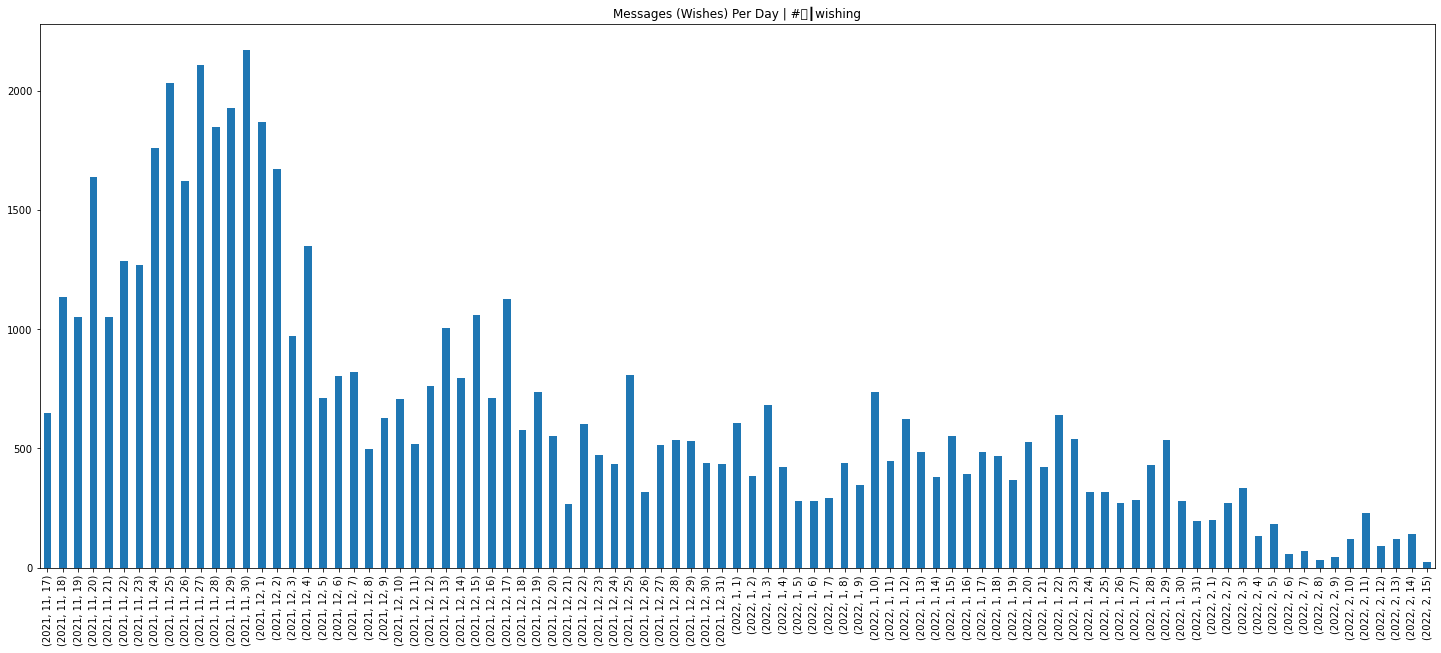

In [25]:
plot = df[df.Author == "Mudae#0807"]['Author'].groupby([df["Date"].dt.year, df["Date"].dt.month, df["Date"].dt.day]).count().plot(kind="bar", figsize=(25, 10))
plot.set_title("Messages (Wishes) Per Day | #🌠┃wishing")
plot.set_xlabel("")

# Reference: https://stackoverflow.com/questions/27365467/can-pandas-plot-a-histogram-of-dates

In [26]:
# Figure out how to do rolling averages
#df['Date'].groupby([df["Date"].dt.year, df["Date"].dt.month, df["Date"].dt.day]).count()

**Messages (Wishes) Per Hour of the Day**

Text(0.5, 0, 'Hour')

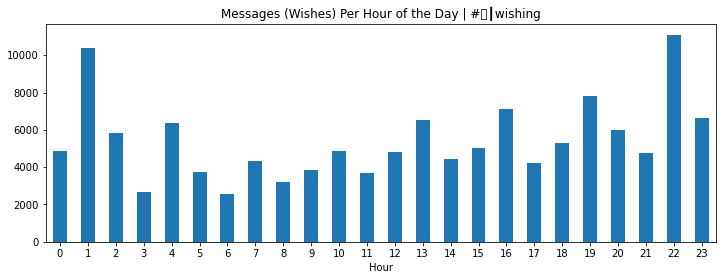

In [27]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["Date"].dt.hour)["Author"].count().plot(kind='bar', rot=0, ax=axs)

plt.title("Messages (Wishes) Per Hour of the Day | #🌠┃wishing");  # custom x label using matplotlib
plt.xlabel("Hour")

# Reference: https://pandas.pydata.org/pandas-docs/dev/getting_started/intro_tutorials/09_timeseries.html

**Messages (Wishes) Per Day of Week**

Text(0, 0.5, 'Count')

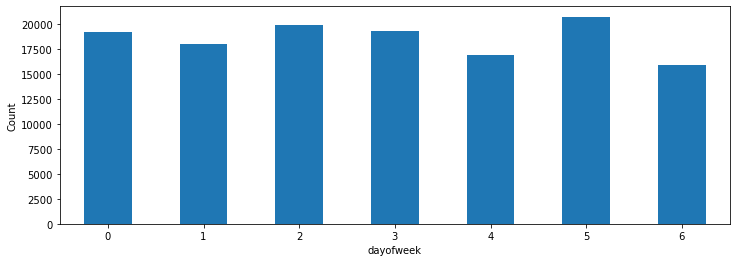

In [28]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["Date"].dt.dayofweek)["Author"].count().plot(kind='bar', rot=0, ax=axs)

plt.xlabel("dayofweek");  # custom x label using matplotlib
plt.ylabel("Count")

**Sweatiest Mudae Player**

In [29]:
df_no_mudae = df.copy()

Exlude `Mudae#0807` from the dataset

In [30]:
df_no_mudae = df_no_mudae.drop(df_no_mudae[df_no_mudae['Author'] == "Mudae#0807"].index)

Text(0.5, 0, 'Message (Wish) Count')

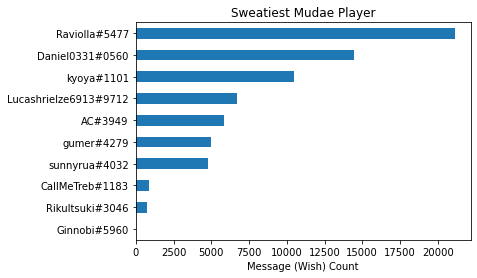

In [31]:
plot = df_no_mudae['Author'].groupby(df['Author']).count().sort_values(ascending=True).plot(kind="barh")
plot.set_title("Sweatiest Mudae Player")
plot.set_ylabel("")
plot.set_xlabel("Message (Wish) Count")

Note: The above is biased towards users with less tendency to use Slash Commands. This is because Slash Commands inputs aren't able to be included in the dataset.

**Ratio of Alt Abusers**

In [32]:
# Verify:
print(df_with_alt['Author'].unique())
print(df_with_alt['Author'].nunique())

['kyoya#1101' 'Daniel0331#0560' 'gumer#4279' 'CallMeTreb#1183'
 'Lucashrielze6913#9712' 'Raviolla#5477' 'albertibay#1663' 'sunnyrua#4032'
 'AC#3949' 'kyoya2#6627' 'Danyeeel_#6535' 'emgumi69420#8911'
 'KamisatoAyato69420#8195' 'ravioli#0974' 'YaeMilk69420#9566'
 'disablebot69420#4303']
16


In [33]:
df_alt_abuser = df_with_alt.copy()

In [34]:
data = [['Raviolla#5477', df_alt_abuser[df_alt_abuser.Author == "ravioli#0974"]['Author'].count() / df_alt_abuser[df_alt_abuser.Author == "Raviolla#5477"]['Author'].count()],
        ['Daniel0331#0560', df_alt_abuser[df_alt_abuser.Author == "Danyeeel_#6535"]['Author'].count() / df_alt_abuser[df_alt_abuser.Author == "Daniel0331#0560"]['Author'].count()],
        ['kyoya#1101', df_alt_abuser[df_alt_abuser.Author == "kyoya2#6627"]['Author'].count() / df_alt_abuser[df_alt_abuser.Author == "kyoya#1101"]['Author'].count()],
        ['Lucashrielze6913#9712', df_alt_abuser[df_alt_abuser.Author == "YaeMilk69420#9566"]['Author'].count() / df_alt_abuser[df_alt_abuser.Author == "Lucashrielze6913#9712"]['Author'].count()],
        ['AC#3949', df_alt_abuser[df_alt_abuser.Author == "KamisatoAyato69420#8195"]['Author'].count() / df_alt_abuser[df_alt_abuser.Author == "AC#3949"]['Author'].count()],
        ['gumer#4279', df_alt_abuser[df_alt_abuser.Author == "emgumi69420#8911"]['Author'].count() / df_alt_abuser[df_alt_abuser.Author == "gumer#4279"]['Author'].count()],
        ['sunnyrua#4032', df_alt_abuser[df_alt_abuser.Author == "disablebot69420#4303"]['Author'].count() / df_alt_abuser[df_alt_abuser.Author == "sunnyrua#4032"]['Author'].count()],
        ['CallMeTreb#1183', df_alt_abuser[df_alt_abuser.Author == "albertibay#1663"]['Author'].count() / df_alt_abuser[df_alt_abuser.Author == "CallMeTreb#1183"]['Author'].count()]
]

In [35]:
df_alt_abuser_ratio = pd.DataFrame(data, columns=['Name', 'Ratio'])

Text(0, 0.5, '')

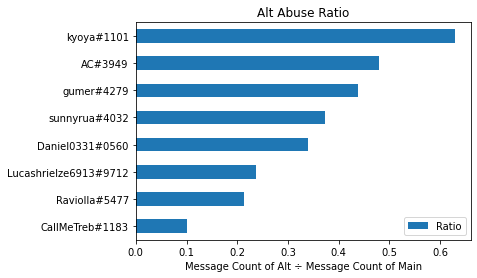

In [36]:
plot = df_alt_abuser_ratio.sort_values(by='Ratio', ascending=True).plot(x='Name', kind="barh")
plot.set_xlabel("Message Count of Alt ÷ Message Count of Main")
plot.set_title("Alt Abuse Ratio")
plot.set_ylabel("")